<a href="https://colab.research.google.com/github/lovelyoyrmia/machine-learning-notebook/blob/main/face_mask_detection_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Face Mask Detection Version 2**

## Download Datasets

In [1]:
! gdown --id 17-FCstm8Fz3bDzFgTmOWHa_c39lTR_1P

Downloading...
From: https://drive.google.com/uc?id=17-FCstm8Fz3bDzFgTmOWHa_c39lTR_1P
To: /content/CMFD.zip
100% 10.3G/10.3G [03:34<00:00, 47.9MB/s]


In [2]:
! unzip CMFD.zip

Streaming output truncated to the last 5000 lines.
  inflating: 29000/29803_Mask.jpg    
 extracting: 29000/29804_Mask.jpg    
  inflating: 29000/29805_Mask.jpg    
  inflating: 29000/29806_Mask.jpg    
  inflating: 29000/29807_Mask.jpg    
  inflating: 29000/29808_Mask.jpg    
  inflating: 29000/29809_Mask.jpg    
  inflating: 29000/29810_Mask.jpg    
  inflating: 29000/29811_Mask.jpg    
  inflating: 29000/29812_Mask.jpg    
  inflating: 29000/29813_Mask.jpg    
  inflating: 29000/29814_Mask.jpg    
  inflating: 29000/29815_Mask.jpg    
  inflating: 29000/29816_Mask.jpg    
  inflating: 29000/29817_Mask.jpg    
  inflating: 29000/29818_Mask.jpg    
 extracting: 29000/29819_Mask.jpg    
  inflating: 29000/29820_Mask.jpg    
  inflating: 29000/29821_Mask.jpg    
  inflating: 29000/29822_Mask.jpg    
  inflating: 29000/29823_Mask.jpg    
  inflating: 29000/29824_Mask.jpg    
  inflating: 29000/29825_Mask.jpg    
  inflating: 29000/29826_Mask.jpg    
  inflating: 29000/29827_Mask.jpg    

In [12]:
! gdown --id 1gjltyD_MnNWcnd56NnjUOizdi39CUEPF

Downloading...
From: https://drive.google.com/uc?id=1gjltyD_MnNWcnd56NnjUOizdi39CUEPF
To: /content/IMFD.zip
100% 10.3G/10.3G [02:32<00:00, 67.2MB/s]


In [13]:
! unzip IMFD.zip

Streaming output truncated to the last 5000 lines.
  inflating: 29000/29811_Mask_Mouth_Chin.jpg  
  inflating: 29000/29812_Mask_Mouth_Chin.jpg  
  inflating: 29000/29813_Mask_Mouth_Chin.jpg  
  inflating: 29000/29814_Mask_Mouth_Chin.jpg  
  inflating: 29000/29815_Mask_Chin.jpg  
  inflating: 29000/29816_Mask_Mouth_Chin.jpg  
  inflating: 29000/29817_Mask_Mouth_Chin.jpg  
  inflating: 29000/29818_Mask_Mouth_Chin.jpg  
 extracting: 29000/29819_Mask_Mouth_Chin.jpg  
  inflating: 29000/29820_Mask_Mouth_Chin.jpg  
  inflating: 29000/29821_Mask_Mouth_Chin.jpg  
  inflating: 29000/29822_Mask_Mouth_Chin.jpg  
  inflating: 29000/29823_Mask_Mouth_Chin.jpg  
  inflating: 29000/29824_Mask_Mouth_Chin.jpg  
  inflating: 29000/29825_Mask_Mouth_Chin.jpg  
  inflating: 29000/29826_Mask_Mouth_Chin.jpg  
  inflating: 29000/29827_Mask_Mouth_Chin.jpg  
 extracting: 29000/29828_Mask_Mouth_Chin.jpg  
  inflating: 29000/29829_Mask_Mouth_Chin.jpg  
  inflating: 29000/29830_Mask_Mouth_Chin.jpg  
  inflating: 29

## Import all of packages

In [40]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import random


## Test one image dataset

In [16]:
img_array = cv2.imread('Face_Mask/00000_Mask.jpg')

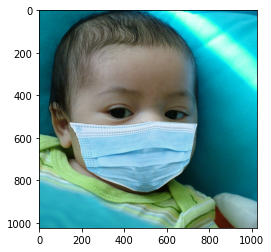

In [19]:
plt.imshow(img_array)

In [18]:
img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

In [20]:
img_array.shape

(1024, 1024, 3)

## Load actual datasets

In [35]:
dataDir = '/content/'
classes = ['Face_Mask', 'No_Mask']
img_size = 224 # Imagenet => 224 x 224

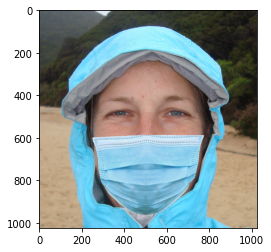

In [36]:
for cat in classes:
  path = os.path.join(dataDir, cat)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img))
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    plt.imshow(img_array)
    plt.show()
    break
  break

## Convert all of images to array

In [37]:
training_datalist = []

def training_data():
  for cat in classes:
    path = os.path.join(dataDir, cat)
    class_num = classes.index(cat)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img))
        new_array = cv2.resize(img_array, (img_size, img_size))
        training_datalist.append([new_array, class_num])
      except Exception:
        return 'Error'

In [38]:
training_data()

In [41]:
random.shuffle(training_datalist)

In [45]:
features = []
labels = []

for feature, label in training_datalist:
  features.append(feature)
  labels.append(label)

features = np.array(features).reshape(-1, img_size, img_size, 3)

In [46]:
features.shape

(1878, 224, 224, 3)

## Normalize data

In [47]:
features = features / 255 ## Normalizing that

In [53]:
labels[20]

1

In [54]:
Y = np.array(labels)

## Save data

In [55]:
import pickle

pickle.dump(features, open('features.pkl', 'wb'))
pickle.dump(labels, open('labels.pkl', 'wb'))

## **Deep Learning for training**

In [56]:
features = pickle.load(open('features.pkl', 'rb'))
labels = pickle.load(open('labels.pkl', 'rb'))

In [57]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [58]:
model = tf.keras.applications.mobilenet.MobileNet() # Pre-trained model

17235968/17225924 [==============================] - 0s 0us/step


In [59]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

## Transfer learning

In [60]:
base_input = model.layers[0].input

In [61]:
base_output = model.layers[-4].output

In [62]:
flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [64]:
new_model = keras.Model(inputs=base_input, outputs=final_output)

In [65]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

## Setup binary classification (Face Mask/No Mask)

In [66]:
new_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [76]:
labels[500:505]

[0, 0, 1, 0, 1]